In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xception-fold-ensembled-model/ensemble_prediction_folds.h5
/kaggle/input/testddd/ensemble_prediction_folds.pkl
/kaggle/input/pretrained-model-on-xception-with-kfold5/brain_mob_fined_for_fold_4.h5
/kaggle/input/pretrained-model-on-xception-with-kfold5/brain_mob_fined_for_fold_1.h5
/kaggle/input/pretrained-model-on-xception-with-kfold5/ensemble_prediction.pkl
/kaggle/input/pretrained-model-on-xception-with-kfold5/voting_classifier_hard-1.pkl
/kaggle/input/pretrained-model-on-xception-with-kfold5/brain_mob_fined_for_fold_2.h5
/kaggle/input/pretrained-model-on-xception-with-kfold5/brain_mob_fined_for_fold_3.h5
/kaggle/input/pretrained-model-on-xception-with-kfold5/brain_mob_fined_for_fold_0.h5
/kaggle/input/pretrained-model-on-xception-with-kfold5/ensemble_prediction_folds.pkl
/kaggle/input/pretrained-model-on-xception-with-kfold5/ensemble_prediction_folds.h5
/kaggle/input/pretrained-model-on-xception-with-kfold5/filtered-data/pituitary_tumor/P_343.jpg
/kaggle/input/pretraine

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.applications import vgg16,vgg19,resnet
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Applying Median & CLAHE Filters

In [ ]:
# Function to apply CLAHE and median filter to an image
def apply_filters(image_path):
    img = cv2.imread(image_path, 0)  # Read the image in grayscale
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Create CLAHE object
    clahe_img = clahe.apply(img)  # Apply CLAHE

    median_filtered_img = cv2.medianBlur(clahe_img, 5)  # Apply median filter with kernel size 5x5

    return median_filtered_img

# Path to your dataset directory containing folders
dataset_path = '/kaggle/input/brain-tumors-256x256/Data'

# Path to the directory where you want to save the processed images
output_path = '/kaggle/working/filtered-data'

# Check if output directory exists, if not, create it
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate through each folder in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for dir_name in dirs:
        folder_path = os.path.join(root, dir_name)
        output_folder_path = folder_path.replace(dataset_path, output_path)
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)

    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):  # Filter images by extension
            image_path = os.path.join(root, file)
            output_folder = root.replace(dataset_path, output_path)
            output_img = apply_filters(image_path)
            output_filename = os.path.join(output_folder, file)
            cv2.imwrite(output_filename, output_img)  # Save the processed image

# Import Images

In [13]:
X=[]
y=[]
os.chdir('/kaggle/input/pretrained-model-on-xception-with-kfold5/filtered-data/glioma_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append((i[0:1]))

  0%|          | 0/901 [00:00<?, ?it/s]

In [14]:
# print(y)
print(len(y))
print(len(X))

901
901


In [15]:
os.chdir('/kaggle/input/pretrained-model-on-xception-with-kfold5/filtered-data/pituitary_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append('p')

  0%|          | 0/844 [00:00<?, ?it/s]

In [16]:
# print(y)
print(len(y))
print(len(X))

1745
1745


In [17]:
os.chdir('/kaggle/input/pretrained-model-on-xception-with-kfold5/filtered-data/meningioma_tumor')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append('m')

  0%|          | 0/913 [00:00<?, ?it/s]

In [18]:
# print(y)
print(len(y))
print(len(X))

2658
2658


In [19]:
os.chdir('/kaggle/working/filtered-data/normal')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append('n')

  0%|          | 0/438 [00:00<?, ?it/s]

In [20]:
# print(y)
print(len(y))
print(len(X))

3096
3096


## Data Preprocess

In [21]:
le = preprocessing.LabelEncoder()
y_1d = le.fit_transform(y)
y_one_hot = tf.keras.utils.to_categorical(y_1d, num_classes=4)

In [22]:
X = np.array(X)
y_encoded = np.array(y_one_hot)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training set:")
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

print("\nTest set:")
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

Training set:
X_train shape:  (2476, 128, 128, 3)
Y_train shape:  (2476, 4)

Test set:
X_test shape:  (620, 128, 128, 3)
Y_test shape:  (620, 4)


## Data Augmentation Model

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to apply augmentation twice to each dataset
def augment_dataset(dataset):
    augmented_data = []
    for img in dataset:
        img = np.expand_dims(img, axis=0)  # Expanding dimensions for batch size
        for _ in range(2):  # Apply augmentation twice
            seed = np.random.randint(0, 1000)  # Different seed for each pass
            for batch in datagen.flow(img, batch_size=1, seed=seed):
                augmented_data.append(np.squeeze(batch))  # Remove the batch dimension
                break  # Stop the loop after one augmented image
    return np.array(augmented_data)

# Apply augmentation twice to X_train, X_test, and X_val
X_augmented = augment_dataset(X_train)
y_augmented = np.repeat(Y_train, 2, axis=0)  # Adjust based on augmentation factor


# Check the shapes of augmented datasets
print("X_train_augmented shape:", X_augmented.shape)
print("y_train_augmented shape:", y_augmented.shape)

X_train_augmented shape: (4952, 128, 128, 3)
y_train_augmented shape: (4952, 4)


In [25]:
from sklearn.utils import shuffle

# Combine original data with augmented data
X_combined = np.concatenate((X_train, X_augmented))
y_combined = np.concatenate((Y_train, y_augmented))


X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)
print(X_combined.shape)
print(y_combined.shape)

(7428, 128, 128, 3)
(7428, 4)


# New Hyper Paramerer Model (Inception V3)

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3 
import kerastuner as kt

def build_model_I(hp):
    vgg_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    

    for layer in vgg_base.layers:
        layer.trainable = True
    
    model = models.Sequential()
    model.add(vgg_base)
    model.add(layers.Flatten())
    
    # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(0.2))

    
    model.add(layers.Dense(4, activation='softmax'))
    
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()
    ]
    model.compile(
        optimizer = tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
        loss =  "categorical_crossentropy",
        metrics=metrics
        
    )
    
    return model

In [21]:
objective = kt.Objective(
    name="val_accuracy",
    direction="max")
# Initialize tuner
tuner_I = kt.GridSearch(
    build_model_I,
    objective=objective,
    max_trials=15,
    executions_per_trial=3,
    directory='brain_tumor_Inc',
    project_name='BrainTumor')



tuner_I.search(X_combined, y_combined, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps_I=tuner_I.get_best_hyperparameters(num_trials=1)[0]



Trial 15 Complete [00h 11m 15s]
val_accuracy: 0.8445491393407186

Best val_accuracy So Far: 0.9439210295677185
Total elapsed time: 02h 46m 53s


In [22]:
print(f"The optimal number of units in the first densely-connected layer is {best_hps_I.get('units')} and the optimal learning rate for the optimizer is {best_hps_I.get('learning_rate')}.")


The optimal number of units in the first densely-connected layer is 96 and the optimal learning rate for the optimizer is 0.0001.


In [27]:
os.chdir('/kaggle/working/')
callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=30, restore_best_weights=True,
    ),
     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=25, min_lr=0.0001)
]
best_val_score = -np.inf
best_model = None

# Use 5-fold cross-validation
kf = KFold(n_splits=5)


for train_index, val_index in kf.split(X_combined):
    X_train, X_val = X_combined[train_index], X_combined[val_index]
    Y_train, Y_val = y_combined[train_index], y_combined[val_index]
    
    best_model_I = tuner_I.hypermodel.build(best_hps_I)
    best_model_I.summary()
    
    history_I = best_model_I.fit(X_train, Y_train, epochs=200,batch_size=32,validation_data=(X_val,Y_val),callbacks=callbacks)
    
    eval_res = best_model_I.evaluate(X_test,Y_test)
    print(f"Evaluation Acc for current fold = {eval_res}")
    
    # Get the validation score for this fold
    val_score = np.mean(history_I.history['val_accuracy'])
    
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = best_model_I
        
best_model.save('best_model_Incp_more_kf.h5')   

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 96)                786528    
                                                                 
 dropout_9 (Dropout)         (None, 96)                0         
                                                                 
 dense_13 (Dense)            (None, 96)                9312      
                                                                 
 dropout_10 (Dropout)        (None, 96)                0         
                                                                 
 dense_14 (Dense)            (None, 96)               

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


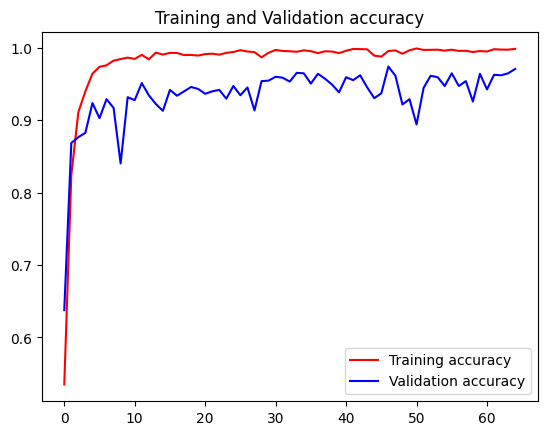

<Figure size 640x480 with 0 Axes>

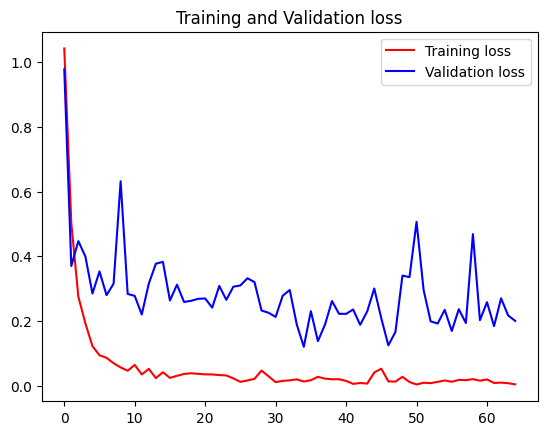

<Figure size 640x480 with 0 Axes>

In [28]:
acc = history_I.history['accuracy']
val_acc= history_I.history['val_accuracy']
loss = history_I.history['loss']
val_loss = history_I.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [29]:
best_model_I.evaluate(X_test,Y_test)

20/20 [==============================] - 1s 30ms/step - loss: 0.3225 - accuracy: 0.9548 - auc_7: 0.9907 - recall_7: 0.9548 - precision_7: 0.9564 - specificity_at_sensitivity_7: 0.9968 - sensitivity_at_specificity_7: 0.9887 - false_negatives_7: 28.0000 - false_positives_7: 27.0000 - true_negatives_7: 1833.0000 - true_positives_7: 592.0000 - f1_score: 0.9536


[0.3225308656692505,
 0.9548386931419373,
 0.9906737804412842,
 0.9548386931419373,
 0.9563812613487244,
 0.9967741966247559,
 0.9887096881866455,
 28.0,
 27.0,
 1833.0,
 592.0,
 array([0.955     , 0.9398281 , 0.945946  , 0.97376096], dtype=float32)]

# Stacking Ensembling 

In [27]:
from keras.models import load_model, clone_model
from keras.layers import concatenate
from keras.layers import Dense,Input
from keras.models import Model
# Load models

mob2 = load_model('/kaggle/input/mobnetv2/best_model_mobilenetv2_kf.h5')
den = load_model('/kaggle/working/best_model_densenet201_kf.h5')
incep = load_model('/kaggle/working/best_model_Incp_more_kf.h5')



# Create a new input layer that matches the shape of data
input_layer = Input(shape=(128, 128, 3))


# Connect models to the new input layer
output1 = den(input_layer)
output2 = mob2(input_layer)
output3 = incep(input_layer)


# Concatenate the output of models
concatenate_layer = concatenate([output1, output2, output3])

output_layer = Dense(4, activation='softmax')(concatenate_layer)

# Create a new model that combines models
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()
    ]

# Compile  model
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)




In [28]:
os.chdir('/kaggle/working/')
callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=25, restore_best_weights=True,
    ),
     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=25, min_lr=0.0001)
]
# Train ensemble model
hist_en = ensemble_model.fit(X_combined, y_combined, epochs=100, validation_split=0.2 ,batch_size=32,callbacks=callbacks)

Epoch 1/100
186/186 [==============================] - 305s 487ms/step - loss: 1.1266 - accuracy: 0.7280 - auc: 0.8544 - recall: 3.3659e-04 - precision: 0.2500 - specificity_at_sensitivity: 0.9411 - sensitivity_at_specificity: 0.9226 - false_negatives: 5940.0000 - false_positives: 6.0000 - true_negatives: 17820.0000 - true_positives: 2.0000 - f1_score: 0.6830 - val_loss: 1.0150 - val_accuracy: 0.9542 - val_auc: 0.9833 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_specificity_at_sensitivity: 0.9957 - val_sensitivity_at_specificity: 0.9987 - val_false_negatives: 1486.0000 - val_false_positives: 0.0000e+00 - val_true_negatives: 4458.0000 - val_true_positives: 0.0000e+00 - val_f1_score: 0.9556 - lr: 1.0000e-04
Epoch 2/100
186/186 [==============================] - 69s 371ms/step - loss: 0.9905 - accuracy: 0.9480 - auc: 0.9808 - recall: 0.0000e+00 - precision: 0.0000e+00 - specificity_at_sensitivity: 0.9953 - sensitivity_at_specificity: 0.9926 - false_negatives: 5942.0000 - fal

In [35]:
ensemble_model.save('brainTumor_stackEnsembled_mob2IncpDen.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


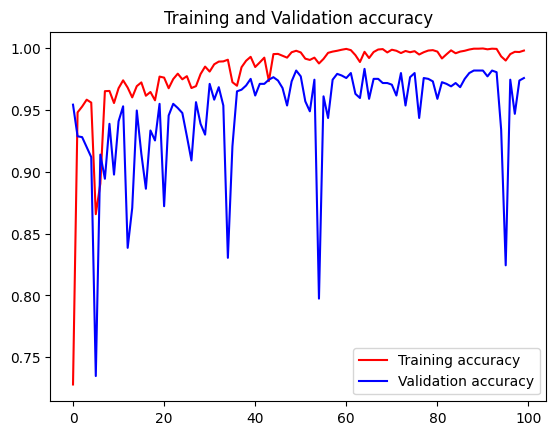

<Figure size 640x480 with 0 Axes>

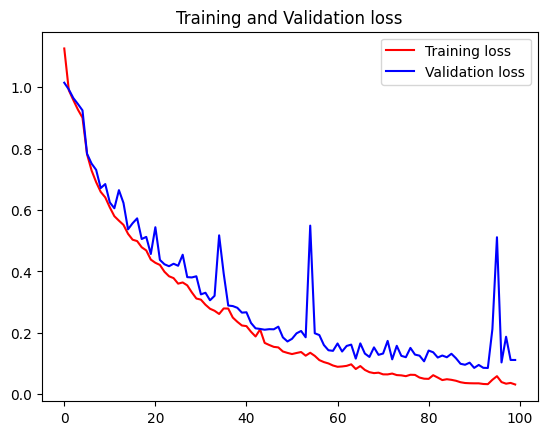

<Figure size 640x480 with 0 Axes>

In [29]:
acc = hist_en.history['accuracy']
val_acc= hist_en.history['val_accuracy']
loss = hist_en.history['loss']
val_loss = hist_en.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [34]:
# Evaluate your ensemble model
ensemble_model.evaluate(X_test, Y_test)


20/20 [==============================] - 2s 108ms/step - loss: 0.1670 - accuracy: 0.9565 - auc: 0.9936 - recall: 0.9548 - precision: 0.9579 - specificity_at_sensitivity: 0.9978 - sensitivity_at_specificity: 1.0000 - false_negatives: 28.0000 - false_positives: 26.0000 - true_negatives: 1834.0000 - true_positives: 592.0000 - f1_score: 0.9572


[0.16697131097316742,
 0.9564515948295593,
 0.993562638759613,
 0.9548386931419373,
 0.9579287767410278,
 0.9978494644165039,
 1.0,
 28.0,
 26.0,
 1834.0,
 592.0,
 array([0.9484536, 0.9488636, 0.96     , 0.9714286], dtype=float32)]

# Average Ensemble

In [44]:
import tensorflow.keras
import tensorflow as tf



models = [incep, den, mob2]

# Define the input shape 
model_input = tf.keras.Input(shape=incep.input_shape[1:])

# Ensemble the models
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model_av = tf.keras.Model(inputs=model_input, outputs=ensemble_output)


ensemble_model_av.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)
hist_av = ensemble_model_av.fit(X_combined, y_combined, epochs=100, validation_split=0.2 ,batch_size=32,callbacks=callbacks)

Epoch 1/100
186/186 [==============================] - 262s 412ms/step - loss: 0.5539 - accuracy: 0.8952 - auc: 0.7394 - recall: 0.3970 - precision: 0.4903 - specificity_at_sensitivity: 0.7822 - sensitivity_at_specificity: 0.8715 - false_negatives: 30126.0000 - false_positives: 20624.0000 - true_negatives: 129262.0000 - true_positives: 19836.0000 - f1_score: 0.4855 - val_loss: 0.4366 - val_accuracy: 0.9300 - val_auc: 0.9853 - val_recall: 0.8627 - val_precision: 0.9690 - val_specificity_at_sensitivity: 0.9987 - val_sensitivity_at_specificity: 0.9919 - val_false_negatives: 204.0000 - val_false_positives: 41.0000 - val_true_negatives: 4417.0000 - val_true_positives: 1282.0000 - val_f1_score: 0.9343 - lr: 1.0000e-04
Epoch 2/100
186/186 [==============================] - 69s 371ms/step - loss: 0.2073 - accuracy: 0.9761 - auc: 0.9985 - recall: 0.9551 - precision: 0.9897 - specificity_at_sensitivity: 0.9999 - sensitivity_at_specificity: 0.9998 - false_negatives: 267.0000 - false_positives: 59

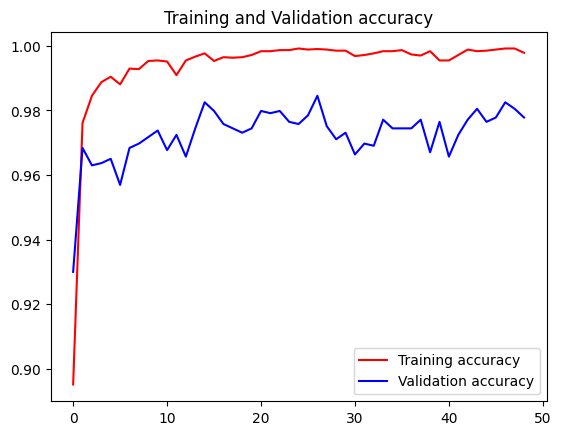

<Figure size 640x480 with 0 Axes>

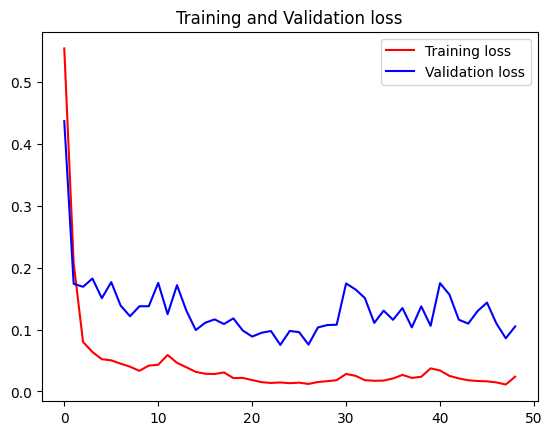

<Figure size 640x480 with 0 Axes>

In [45]:
acc = hist_av.history['accuracy']
val_acc= hist_av.history['val_accuracy']
loss = hist_av.history['loss']
val_loss = hist_av.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [46]:
ensemble_model_av.evaluate(X_test,Y_test)

20/20 [==============================] - 9s 108ms/step - loss: 0.1432 - accuracy: 0.9677 - auc: 0.9946 - recall: 0.9661 - precision: 0.9740 - specificity_at_sensitivity: 0.9978 - sensitivity_at_specificity: 0.9935 - false_negatives: 21.0000 - false_positives: 16.0000 - true_negatives: 1844.0000 - true_positives: 599.0000 - f1_score: 0.9669


[0.14324022829532623,
 0.9677419066429138,
 0.9945867657661438,
 0.9661290049552917,
 0.9739837646484375,
 0.9978494644165039,
 0.9935483932495117,
 21.0,
 16.0,
 1844.0,
 599.0,
 array([0.956743  , 0.9684813 , 0.9594594 , 0.98285717], dtype=float32)]

# Draw Confusion Matrix

20/20 [==============================] - 0s 19ms/step
Confusion Matrix:
[[192   2   1   4]
 [  6 163   2   2]
 [  3   0  72   1]
 [  0   2   0 170]]


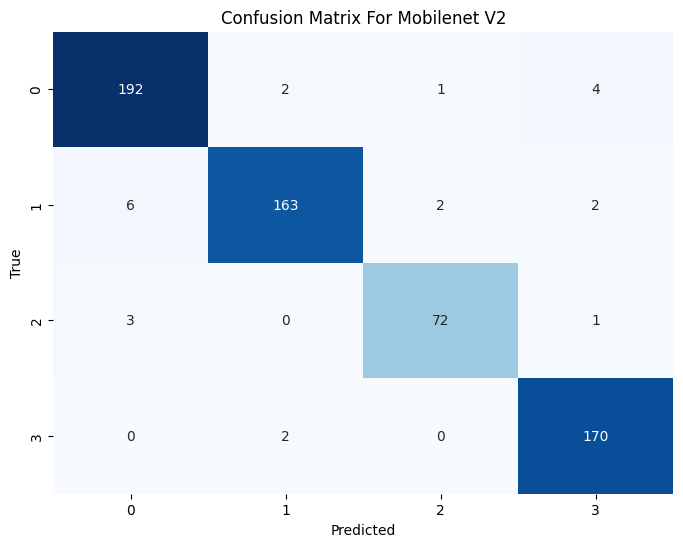

20/20 [==============================] - 1s 25ms/step
Confusion Matrix:
[[180  10   2   7]
 [  5 155   1  12]
 [  3   0  72   1]
 [  0   0   0 172]]


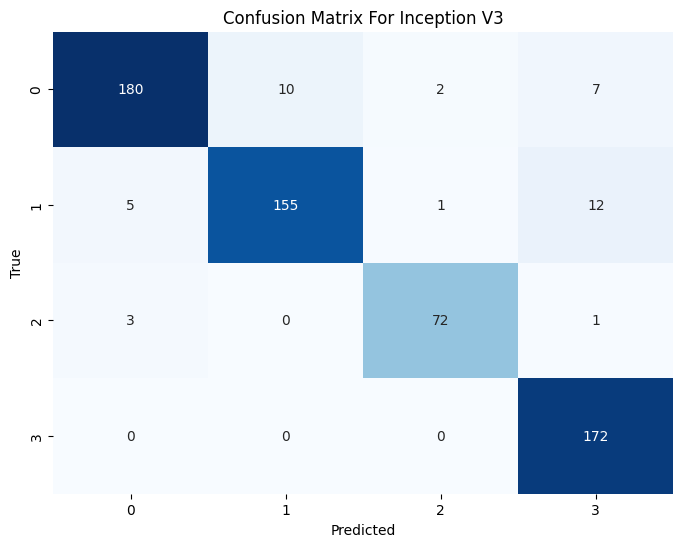

20/20 [==============================] - 1s 57ms/step
Confusion Matrix:
[[188  10   0   1]
 [  5 166   0   2]
 [  4   1  70   1]
 [  5   0   0 167]]


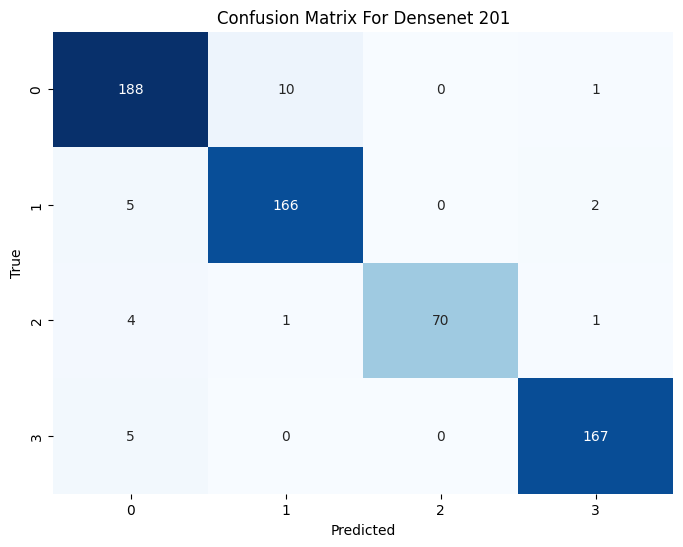

20/20 [==============================] - 8s 99ms/step
Confusion Matrix:
[[180   9   2   8]
 [  5 155   1  12]
 [  3   0  72   1]
 [  0   0   0 172]]


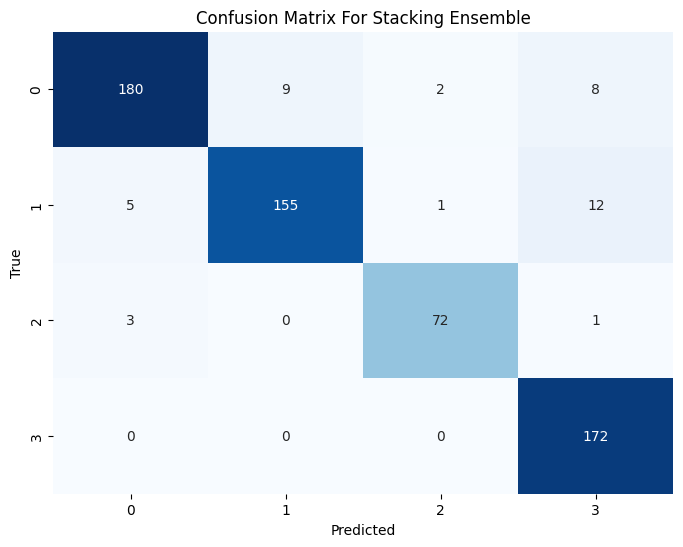

20/20 [==============================] - 10s 99ms/step
Confusion Matrix:
[[188   6   1   4]
 [  3 169   0   1]
 [  3   1  71   1]
 [  0   0   0 172]]


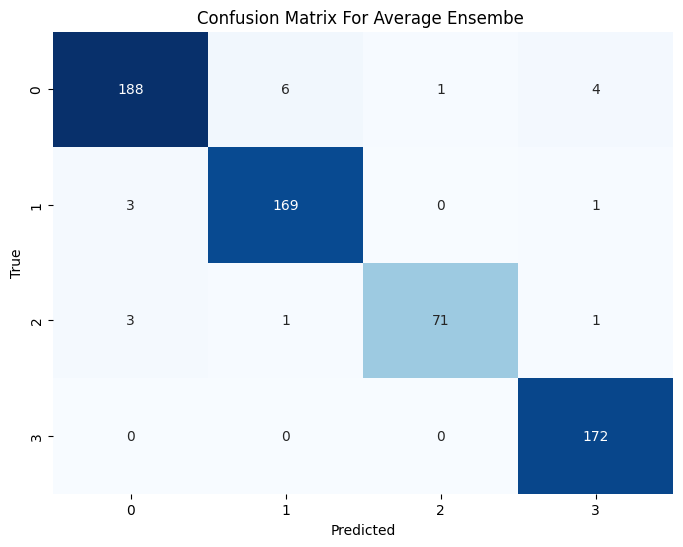

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ensemble_prediction =mob2.predict(X_test)
y_true_categorical = np.argmax(Y_test, axis=1)
ensemble_prediction_categorical = np.argmax(ensemble_prediction, axis=1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_categorical, ensemble_prediction_categorical)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Mobilenet V2')
plt.show()

ensemble_prediction =incep.predict(X_test)
y_true_categorical = np.argmax(Y_test, axis=1)
ensemble_prediction_categorical = np.argmax(ensemble_prediction, axis=1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_categorical, ensemble_prediction_categorical)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Inception V3')
plt.show()

ensemble_prediction =den.predict(X_test)
y_true_categorical = np.argmax(Y_test, axis=1)
ensemble_prediction_categorical = np.argmax(ensemble_prediction, axis=1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_categorical, ensemble_prediction_categorical)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Densenet 201')
plt.show()


ensemble_prediction =ensemble_model.predict(X_test)
y_true_categorical = np.argmax(Y_test, axis=1)
ensemble_prediction_categorical = np.argmax(ensemble_prediction, axis=1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_categorical, ensemble_prediction_categorical)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Stacking Ensemble')
plt.show()

ensemble_prediction =ensemble_model_av.predict(X_test)
y_true_categorical = np.argmax(Y_test, axis=1)
ensemble_prediction_categorical = np.argmax(ensemble_prediction, axis=1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_categorical, ensemble_prediction_categorical)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Average Ensembe ')
plt.show()

# Model Dense 201 (Fine tuned) cross validation

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet201
import kerastuner as kt
import tensorflow as tf

def build_model_densenet201(hp):
    densenet201_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    for layer in densenet201_base.layers:
        layer.trainable = True
    
    model = models.Sequential()
    model.add(densenet201_base)
    model.add(layers.Flatten())
    
    # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=512, step=32), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=128, step=32), activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(4, activation='softmax'))
    
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()
    ]
    model.compile(
        optimizer = tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-4,1e-5])),
        loss =  "categorical_crossentropy",
        metrics=metrics
    )
    
    return model 


/tmp/ipykernel_52165/1076050168.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [27]:
os.chdir('/kaggle/working/')

objective = kt.Objective(
    name="val_accuracy",
    direction="max")
# Initialize tuner
tuner_densenet201 = kt.GridSearch(
    build_model_densenet201,
    objective=objective,
    max_trials=8,
    executions_per_trial=2,
    directory='brain_tumor_densenet201',
    project_name='BrainTumor')


tuner_densenet201.search(X_combined, y_combined, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps_densenet201=tuner_densenet201.get_best_hyperparameters(num_trials=1)[0]


Trial 8 Complete [00h 18m 21s]
val_accuracy: 0.9353970289230347

Best val_accuracy So Far: 0.9717361927032471
Total elapsed time: 02h 26m 02s


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

os.chdir('/kaggle/working/')
callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=25, restore_best_weights=True,
    ),
     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=25, min_lr=0.0001)
]
best_val_score = -np.inf
best_model = None

# Use 5-fold cross-validation
kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X_combined):
    X_train, X_val = X_combined[train_index], X_combined[val_index]
    Y_train, Y_val = y_combined[train_index], y_combined[val_index]
    
    best_model_densenet201 = tuner_densenet201.hypermodel.build(best_hps_densenet201)
    best_model_densenet201.summary()
    
    history_densenet201= best_model_densenet201.fit(X_train, Y_train, epochs=100,batch_size=32,validation_data=(X_val,Y_val),callbacks=callbacks)
    
    eval_densenet201= best_model_densenet201.evaluate(X_test,Y_test)
    print(f"Evaluation Acc for current fold = {eval_densenet201}")
    
    # Get the validation score for this fold
    val_score = np.mean(history_densenet201.history['val_accuracy'])
    
    if val_score > best_val_score:
        best_val_score = val_score
        best_model = best_model_densenet201

    # Plotting the accuracy and loss for this fold
    plt.figure(figsize=(12, 4))
    
    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_densenet201.history['accuracy'], label='Training Accuracy')
    plt.plot(history_densenet201.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {train_index+1} - Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_densenet201.history['loss'], label='Training Loss')
    plt.plot(history_densenet201.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {train_index+1} - Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

best_model.save('/kaggle/working/best_model_densenet201_kf.h5')

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have predictions from the best model on X_test
predictions = best_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1))

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Last Fold densenet201')
plt.show()


In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming best_model is your trained Keras Sequential model
# Assuming X_test holds your test data and y_test holds your true labels

# Get the predicted probabilities for each class
predicted_probabilities = best_model.predict(X_test)

# Binarize the true labels
num_classes = 4
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Initialize variables for ROC and AUC calculation
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])  # Adjust the colors for more classes
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.grid()
plt.show()
